## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
new_page_miss_group = len(df.query('group == "control"   and landing_page == "new_page"'))
#new_page_miss_group = len(new_page_miss_group)
old_page_miss_group = len(df.query('group == "treatment" and landing_page == "old_page"'))
print('Number of times control group lands on the new page'   ,new_page_miss_group)
print('Number of times treatment group lands on the old page' ,old_page_miss_group)
print('The number of times the new_page and treatment dont line up' , new_page_miss_group+old_page_miss_group)

Number of times control group lands on the new page 1928
Number of times treatment group lands on the old page 1965
The number of times the new_page and treatment dont line up 3893


f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.drop(df.query('group == "control" and landing_page == "new_page"').index)

In [10]:
df2 = df2.drop(df2.query('group == "treatment" and landing_page == "old_page"').index)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
repeated_user = df2[df2.duplicated(['user_id'])]
print(repeated_user)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [14]:
repeated_user_info = df2.query('user_id == "773192"')
print(repeated_user_info)

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop([1899] , inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
prob_control_converted = df2.query('group == "control"')['converted'].mean()
print('prob_control_converted' , ' ' ,prob_control_converted)

prob_control_converted   0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
prob_treatment_converted = df2.query('group == "treatment"')['converted'].mean()
print('prob_treatment_converted' , ' ' ,prob_treatment_converted)

prob_treatment_converted   0.118808065515


d. What is the probability that an individual received the new page?

In [19]:
df2.query('landing_page == "new_page"').count()[0]

145310

In [20]:
print('probability that an individual received the new page' ,' ', 145310/290584)

probability that an individual received the new page   0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

From the calcualted probabilities we can't find suffiecient evidence to say new treatment page leads to more conversions
as probailty for control conversion is 12.04% and conversion for overlall is 11.96% with calculated difference of 0.08%
shows no actual evidence the new treatment is working

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

null hypothesis: pnew <= pold
alternative hypothesis: pnew > pold

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new = df2.query('landing_page == "new_page"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = df2.query('landing_page == "old_page"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(1 , p_new , n_new)
new_page_converted.mean()

0.1193173215883284

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(1 , p_old , n_old)
print(old_page_converted)
print(old_page_converted.mean())

[0 0 0 ..., 1 0 0]
0.118458912125


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
diff = new_page_converted.mean() - old_page_converted.mean()
print('p_new - p_old' , diff) 

p_new - p_old 0.000858409463654


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
p_diffs = []
for _ in range (10000):
    new_page_converted = np.random.binomial(1 , p_new , n_new)
    old_page_converted = np.random.binomial(1 , p_old , n_new)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [29]:
print(new_page_converted.mean() , old_page_converted.mean())

0.119860986856 0.120026150988


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

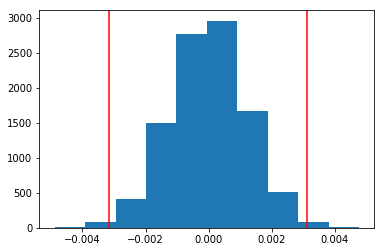

In [30]:
p_diffs = np.array(p_diffs)
low = np.percentile(p_diffs, .5)
up = np.percentile(p_diffs, 99.5)
plt.hist(p_diffs);
plt.axvline(x=low, color='red');
plt.axvline(x=up, color='red');

Yes.According to the central limit theorem with big enough sample the sample mean follows a normal bell shape distribution.
looking at 99% confidence interval shows that our statistic was generated by the null hypothesis.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
control_convert_actual = df2.query('group == "control"')['converted'].mean()
treatment_convert_actual = df2.query('group == "treatment"')['converted'].mean()
obs_diff = treatment_convert_actual - control_convert_actual
obs_diff

-0.0015782389853555567

In [32]:
#p_diff = []
#size = df.shape[0]
#for _ in range(10000):
#    b_samp = df2.sample(size, replace = True)
#    new_page_converted = b_samp.query('landing_page == "new_page"')['converted'].mean()
#    old_page_converted = b_samp.query('landing_page == "old_page"')['converted'].mean()
#    p_diff.append(new_page_converted - old_page_converted)

In [33]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

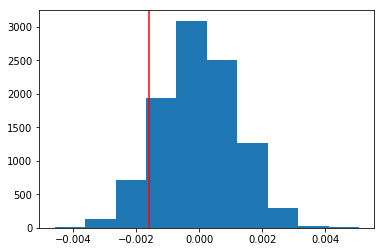

In [34]:
plt.hist(null_vals);
plt.axvline(obs_diff , color = 'red')

In [35]:
(null_vals > obs_diff).mean()

0.89929999999999999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
We just computed the P-value for our observation.
Our null hypothesis is pnew <= pold and our alternative hypothesis is pnew > pold.
Refering to Type I error rate of 5% 
pvalue <= 0.05 (reject null hypothesis)
pvalue > 0.05 (fail to reject the null hypothesis)
using the computed P-value we find pvalue is larger than our error rate, therefore we conclude that we fail to reject the null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == "1"').count()[0]
convert_new = df2.query('landing_page == "new_page" and converted == "1"').count()[0]
n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [40]:
z_score , p_value = sm.stats.proportions_ztest([convert_old , convert_new] , [n_old , n_new] ,alternative='larger')
z_score , p_value

(1.3109241984234394, 0.094941687240975514)

In [43]:
#calculating the critical value at 95% confidence
from scipy.stats import norm
norm.ppf(1 - .025)

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

z_score and p_value indicates more evidence to fail to reject the null hypothesis as z_score is smaller than our critical value.
both values computed in j ,k and m indicates no change in the conversion between new page and old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic Regression as we trying to predict the outcome of two entries

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
df2['intercept'] = 1
df2[['new_page' , 'old_page']] = pd.get_dummies(df2['landing_page'])
#created two dummy columns fot landing_page

In [45]:
df2[['control' , 'ab_page']] = pd.get_dummies(df2['group'])
#created two dummy columns to match entries from group 
df2.head()
#control and old_page are same , ab_page and new_page are same we can drop the duplicated columns
df2.drop(columns = ['new_page' , 'control'],axis =1, inplace=True)

In [46]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [47]:
log_m = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = log_m.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [48]:
#result.summary()
#due to error module 'scipy.stats' has no attribute 'chisqprob' while using summary() switched to summary2
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-29 19:45 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [49]:
#reading ab_page coef
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

p-value associated with ab_page is 0.1899.
the p-value differs from p-value in part 2 as in part 2 our null hypothesis is old-page is better than or equal to new-page.
while in regression p-values have a different meaning relating to slope as it predict the outcome of two inputs.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

Adding other factors adventage is that it gives us more of the information available to us who estimate the dependent variable.
disadventage of adding other factors are multiple which include:
The quality of the predicted model, such as using adjusted R square
The choice of optimum model balancing complexity against explanatory power
The best method for establishing the optimal model choice, e.g. backwards
Whether to include Interaction effects
Multicollinearity

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [50]:
c_df = pd.read_csv('countries.csv')
c_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [51]:
#merging two df
merged_df = df2.join(c_df.set_index('user_id'), on='user_id')

In [52]:
merged_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US


In [53]:
#reading unique countries code
merged_df['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [54]:
merged_df[['CA', 'UK', 'US']] = pd.get_dummies(merged_df['country'])
merged_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,old_page,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1


In [55]:
merged_df.drop(columns = ['CA'],axis = 1 , inplace=True)

In [56]:
log_m = sm.Logit(merged_df['converted'] , merged_df[['intercept','ab_page','UK','US']])
result = log_m.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-29 19:45 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [57]:
print('coef ab_page' , 1/np.exp(-0.0149))
print('coef UK' , np.exp(0.0506))
print('coef US' , np.exp(0.0408))

coef ab_page 1.01501155838
coef UK 1.0519020483
coef US 1.04164375596


for every user logging from Uk coversion is 5.19% more likely holding all other varible constant
for every user logging from US coversion is 4.16% more likely holding all other varible constant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
merged_df['ab_page&UK'] = merged_df['ab_page'] * merged_df['UK'] 
merged_df['ab_page&US'] = merged_df['ab_page'] * merged_df['US']

In [59]:
merged_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,old_page,ab_page,country,UK,US,ab_page&UK,ab_page&US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,1,0,0


In [60]:
log_m = sm.Logit(merged_df['converted'], merged_df[['intercept','ab_page','UK','US','ab_page&UK','ab_page&US']])
result = log_m.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-29 19:46 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_page&UK     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_page&US     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

In [61]:
np.exp(result.params)

intercept     0.134794
ab_page       0.934776
UK            1.011854
US            1.017682
ab_page&UK    1.081428
ab_page&US    1.048001
dtype: float64

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
X = merged_df[['ab_page','ab_page&UK','ab_page&US','US','UK']]
y = merged_df['converted']
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size = 0.10, random_state = 0)
log_m = LogisticRegression()
log_m.fit(X_train,y_train)
pred = log_m.predict(X_test)
accuracy_score(y_test ,pred)

0.88003716576619984

Convert is 1.08 times more likely to happen for UK and new page users than CA and new page users, holding all other varible constant.
Convert is 1.04 times more likely to happen for US and new page users than CA and new page users, holding all other varible constant.

Convert is 1.18 % more likely to happen for the users in UK than CA, holding all other varible constant.
Convert is 1.76 % more likely to happen for the users in US than CA, holding all other varible constant

with our investigation done we conlclude that only the intercept has p-value less than our error 5%  which is significant for conversion rate,however other factors don't provide any statistically significant,therefore the country of a user is not significant.

refering to all above findings we conlude that for practicality we should continue with old page as the statistics found aren't significant to support the conversion and it would be waste of resource.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0